<a href="https://colab.research.google.com/github/Zahab163/Data_Quest_Traffic/blob/main/Data_Quest_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [12]:
traffic = pd.read_csv('https://raw.githubusercontent.com/Gmann13/Traffic-Projection/main/Metro_Interstate_Traffic_Volume.csv')

traffic.head()



,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [13]:
traffic['holiday'].value_counts()

,count
holiday,
Labor Day,7
Christmas Day,6
Thanksgiving Day,6
Martin Luther King Jr Day,6
New Years Day,6
Veterans Day,5
Columbus Day,5
Memorial Day,5
Washingtons Birthday,5


In [14]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [17]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


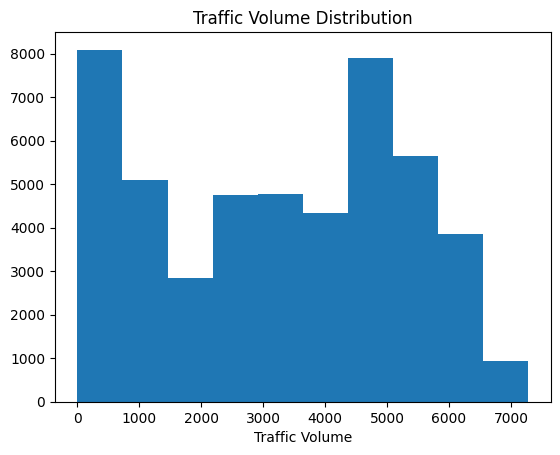

In [18]:
plt.hist(traffic["traffic_volume"])
plt.xlabel("Traffic Volume")
plt.title("Traffic Volume Distribution")
plt.show()

In [19]:
traffic['date_time'] =pd.to_datetime(traffic['date_time'])

day = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]


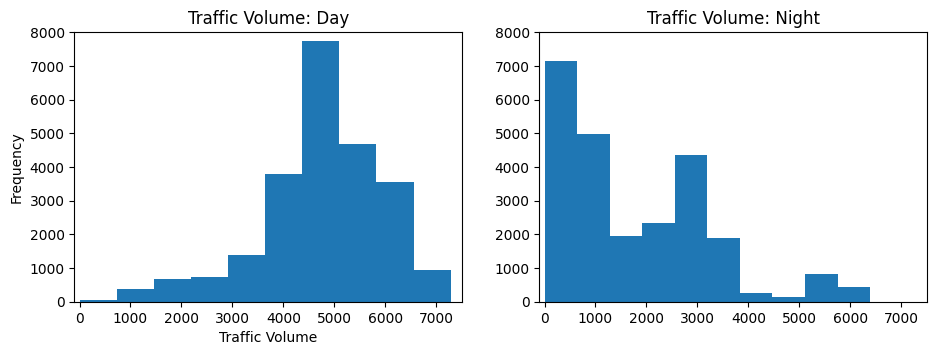

In [20]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')

plt.show()

In [21]:
day.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,2016-01-05 00:55:02.676215552,4762.047452
min,0.000000,0.00000,0.000000,0.000000,2012-10-02 09:00:00,0.000000
25%,272.680000,0.00000,0.000000,5.000000,2014-02-04 10:00:00,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,2016-06-12 11:00:00,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,2017-08-14 14:00:00,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,2018-09-30 18:00:00,7280.000000
std,13.298885,63.62932,0.008853,37.564588,NaN,1174.546482


In [22]:
night.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,2016-01-05 20:26:34.672585984,1785.377441
min,0.000000,0.000000,0.000000,0.000000,2012-10-02 19:00:00,0.000000
25%,271.700000,0.000000,0.000000,1.000000,2014-02-08 20:30:00,530.000000
50%,281.379000,0.000000,0.000000,40.000000,2016-06-09 23:00:00,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2017-08-08 20:30:00,2819.000000
max,307.680000,55.630000,0.510000,100.000000,2018-09-30 23:00:00,6386.000000
std,13.296357,1.110872,0.007434,40.048382,NaN,1441.951197


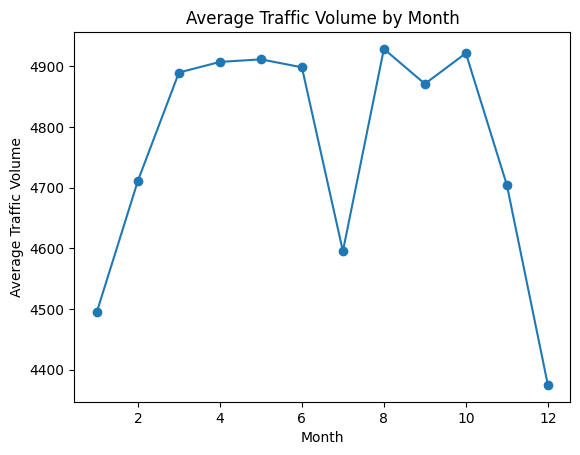

In [23]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
plt.plot(by_month['traffic_volume'], marker='o')
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.show()

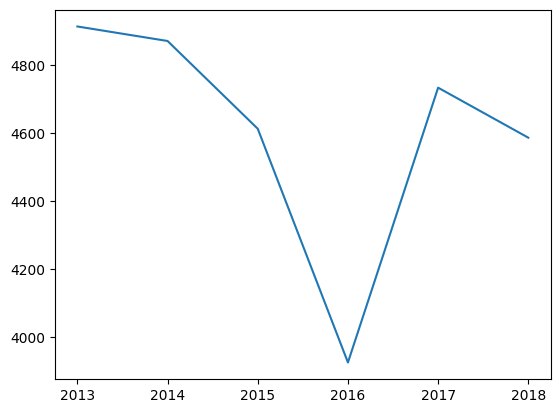

In [25]:
day['year'] = day['date_time'].dt.year
only_july =day[day['month'] == 7]
plt.plot(only_july.groupby('year').mean(numeric_only=True)['traffic_volume'])
plt.show()

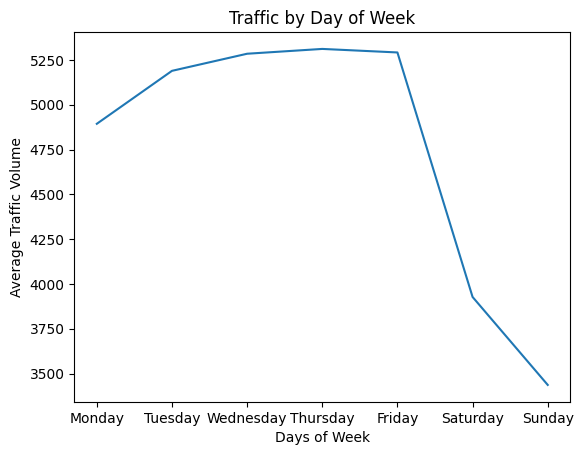

In [26]:
day['dayofweek'] =day['date_time'].dt.dayofweek
by_dayofweek =day.groupby('dayofweek').mean(numeric_only=True)
plt.plot (by_dayofweek['traffic_volume'])

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(len(days)), days)
plt.xlabel('Days of Week')
plt.ylabel('Average Traffic Volume')
plt.title('Traffic by Day of Week')
plt.show()

In [30]:
day['hour'] = day['date_time'].dt.hour
business_days_df = day[day['dayofweek'] <= 4].copy() # 4 == Friday
weekend_df = day[day['dayofweek'] >= 5].copy() # 5 Saturday
by_hour_business = business_days_df.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend_df.groupby('hour').mean(numeric_only=True)

Text(0.5, 1.0, 'Traffic Volume by Hour: Monday-Friday')

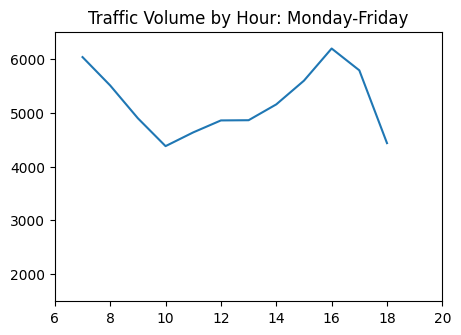

In [31]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume by Hour: Monday-Friday')

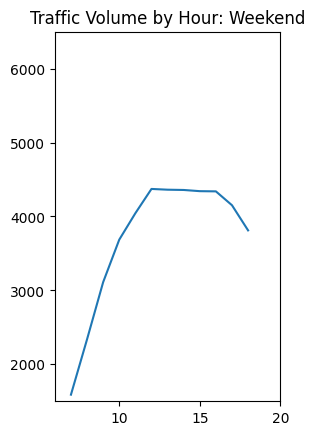

In [32]:
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume by Hour: Weekend')

plt.show()

##Weather Indicators

In [34]:
weather_cols = ['clouds_all', 'snow_1h', 'rain_1h', 'temp', 'traffic_volume']
day[weather_cols].corr(numeric_only=True)['traffic_volume'].sort_values()

,traffic_volume
clouds_all,-0.032932
snow_1h,0.001265
rain_1h,0.003697
temp,0.128317
traffic_volume,1.000000


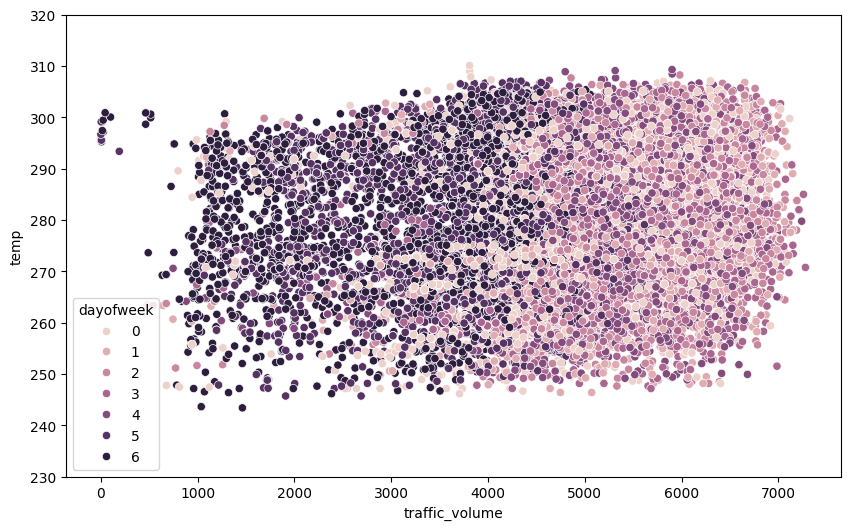

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='traffic_volume', y='temp', hue='dayofweek', data=day)
plt.ylim(230, 320)
plt.show()

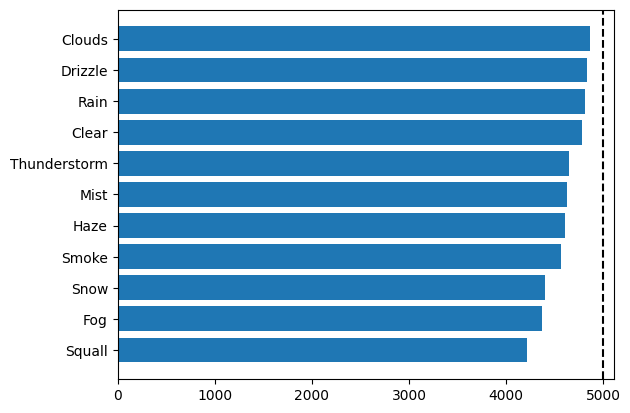

In [36]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True).sort_values('traffic_volume')
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.axvline(x=5000,linestyle="--",color="k")
plt.show()

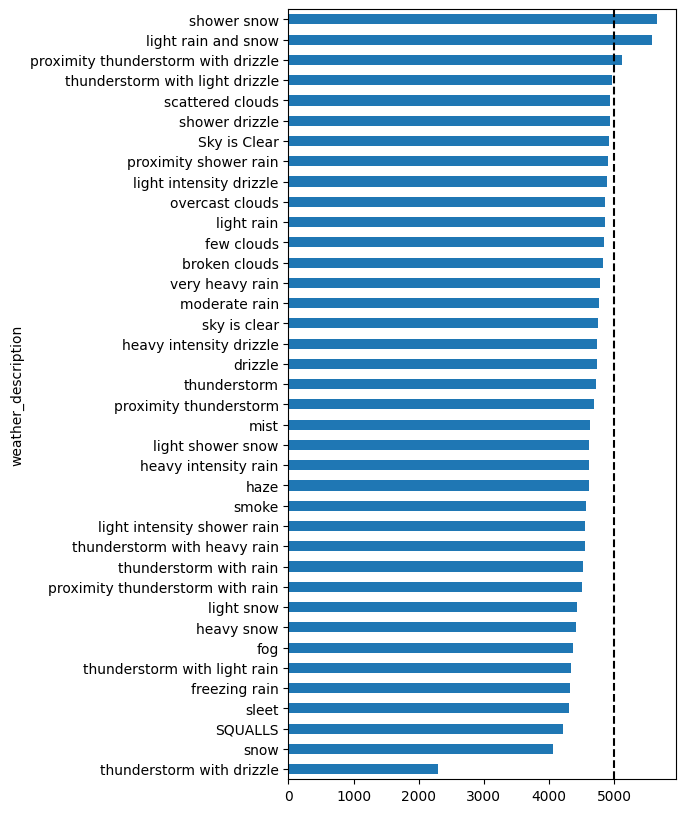

In [37]:
by_weather_description = day.groupby('weather_description').mean(numeric_only=True).sort_values('traffic_volume')
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.axvline(x=5000,linestyle="--",color="k")
plt.show()

In [40]:
day.groupby('weather_description').count().sort_values('traffic_volume')['traffic_volume']

,traffic_volume
weather_description,
SQUALLS,1
shower snow,1
freezing rain,2
thunderstorm with drizzle,2
sleet,3
shower drizzle,3
light rain and snow,4
proximity thunderstorm with drizzle,6
thunderstorm with light drizzle,6
